# Scrape your first website using Beautifulsoup

with Beautiful Soup we can:

* Parsing: It takes messy HTML or XML code and transforms it into a structured, easily searchable format.
* Navigation: You can easily move through the parsed document, finding specific elements like tags, attributes, and text.
* Searching: Beautiful Soup provides tools to find elements based on their tags, attributes, or content.
* Extraction: Once you've located the data you want, Beautiful Soup helps you extract it cleanly.

* install beautifulsoup with pip

In [1]:
# install beautiful soup
!pip install beautifulsoup4 -q

* to scrap any web page we will need also **requests** to send any type of http (get,post,put,delete) request to our target.

In [2]:
from bs4 import BeautifulSoup
import requests #with requests we can to any http request (get,post,put,delete)

* in our tutorial we will try to **scrap 6 post news** from https://www.goud.ma, as in the images below ...

<center>

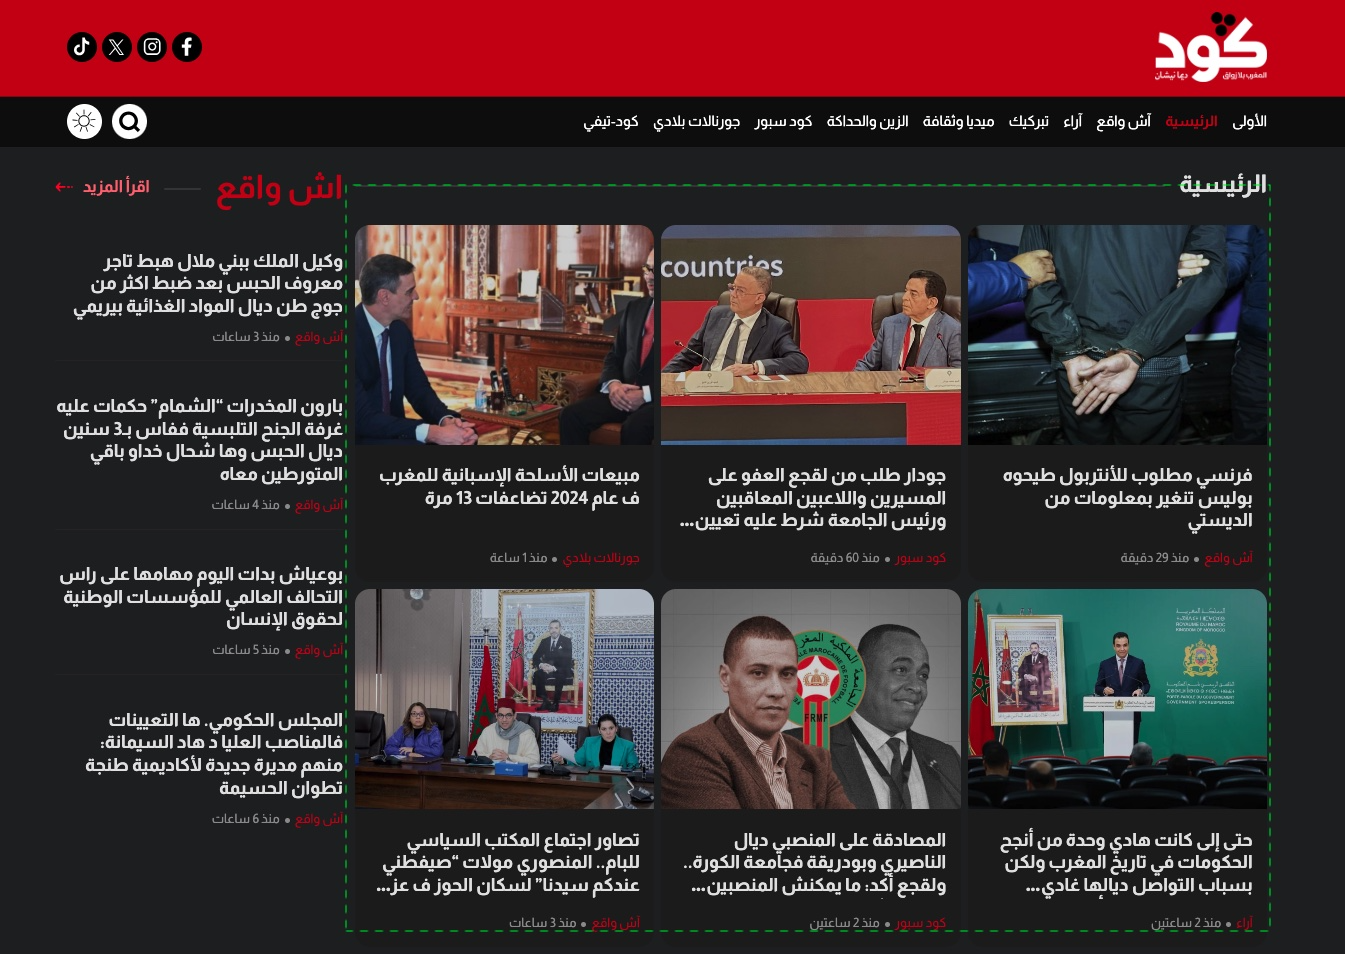

</center>

* Before beginning our scraping first of all we need to analyze the HTML of our targeted website to extract which HTML object we will target.

* as in the image below we will target the article object with the `´card´` class, then inside of it we will extract the href link to the content of the article, and we will repeat the same things with other articles.

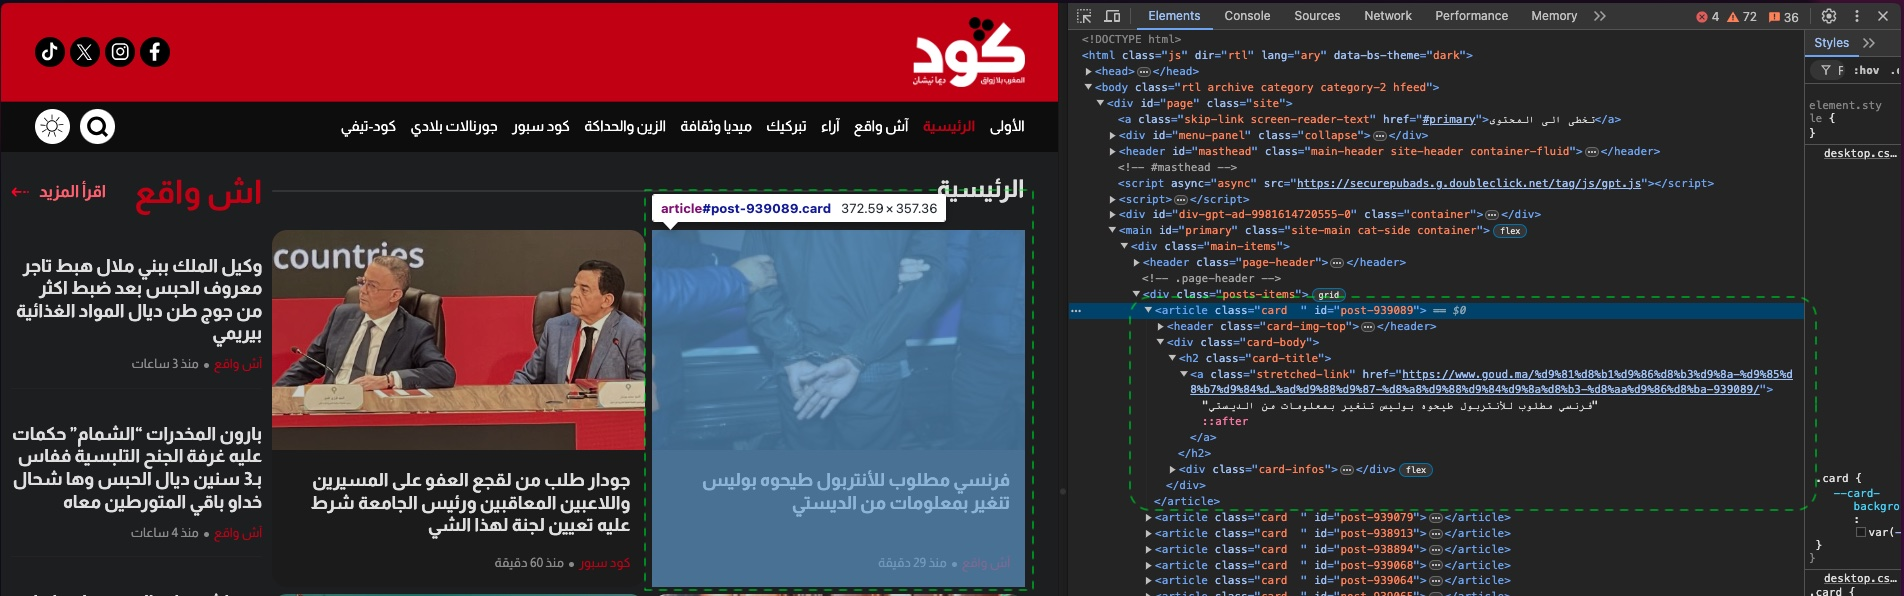

* to do what explained above, we need to follow the next steps:
1. send a GET request to our target website.
2. parse the response with bs4.
3. extract the target HTML object we want using its HTML tag (name) in our case `article` and its class `card` or id.

In [28]:
# 1.1 send get request
target="https://www.goud.ma/topics/%d8%a7%d9%84%d8%b1%d8%a6%d9%8a%d8%b3%d9%8a%d8%a9/"
page=requests.get(target,headers={"User-Agent": "XY"})
if page.reason=="OK":
  print("[INFO] Request is Valide")
else:
  print("[INFO] Request is not Valide")

[INFO] Request is Valide


In [29]:
# 1.2 extract html from the page
page_html=page.text
print(page_html[:50])

<!doctype html>
<html class="no-js" dir="rtl" lang


In [30]:
# 2. parse html with bs4
page_soup=BeautifulSoup(page_html,"html")

In [32]:
# 3. find article html object
articles=page_soup.find_all(name="article",class_="card")[:6] # 6 articles
articles

[<article class="card" id="post-939051">
 <header class="card-img-top">
 <img alt="من بينها بورش ورانج روفر.. الحرس المدني حبط تهريب 10 طوموبيلات مسروقة كانت فطريقها للمغرب" class="gd-img img-fluid wp-post-image" decoding="async" height="400" loading="lazy" sizes="(max-width: 600px) 100vw, 600px" src="https://sf.goud.ma/wp-content/uploads/2025/03/سرقة-سيارات-فارهة-600x400.jpg" srcset="https://sf.goud.ma/wp-content/uploads/2025/03/سرقة-سيارات-فارهة-600x400.jpg 600w, https://sf.goud.ma/wp-content/uploads/2025/03/سرقة-سيارات-فارهة.jpg 750w" width="600"/> </header>
 <div class="card-body">
 <h2 class="card-title"><a class="stretched-link" href="https://www.goud.ma/%d9%85%d9%86-%d8%a8%d9%8a%d9%86%d9%87%d8%a7-%d8%a8%d9%88%d8%b1%d8%b4-%d9%88%d8%b1%d8%a7%d9%86%d8%ac-%d8%b1%d9%88%d9%81%d8%b1-%d8%a7%d9%84%d8%ad%d8%b1%d8%b3-%d8%a7%d9%84%d9%85%d8%af%d9%86%d9%8a-939051/">من بينها بورش ورانج روفر.. الحرس المدني حبط تهريب 10 طوموبيلات مسروقة كانت فطريقها للمغرب</a></h2> <div class="card-infos">
 <spa

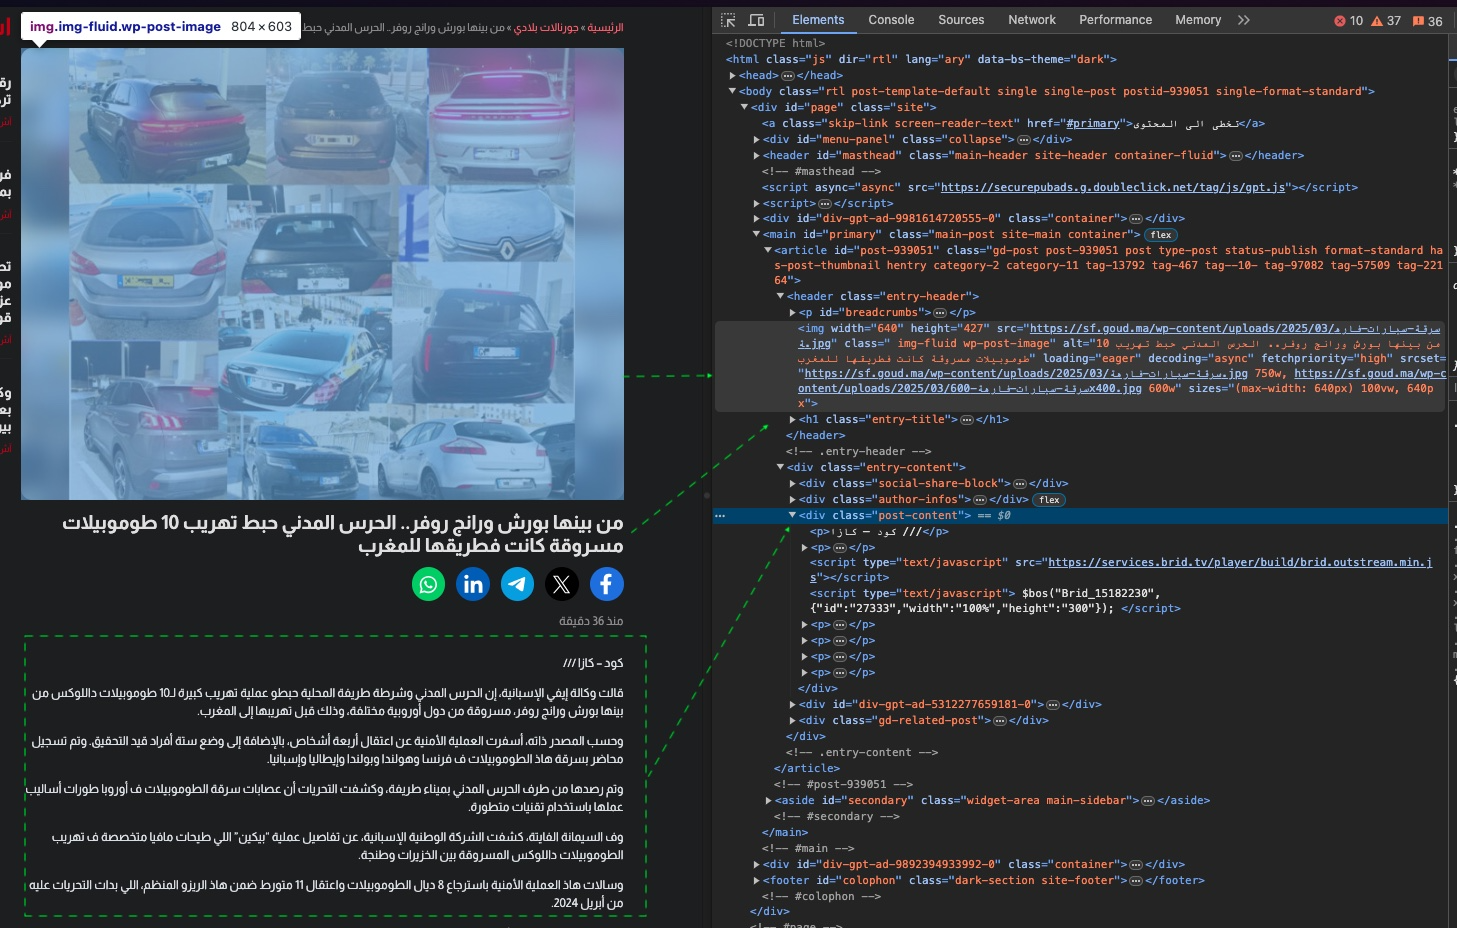

* after finishing the first step, now we will move to extract the content of each article as in the image below.
* to do this we need to extract the html object `a` with class `stretched-link` class from the articles above.
* then extract `href` link

In [33]:
articles_links=[
    article.find("a",class_="stretched-link"). # 1
    get("href") # 2
    for article in articles]
articles_links

['https://www.goud.ma/%d9%85%d9%86-%d8%a8%d9%8a%d9%86%d9%87%d8%a7-%d8%a8%d9%88%d8%b1%d8%b4-%d9%88%d8%b1%d8%a7%d9%86%d8%ac-%d8%b1%d9%88%d9%81%d8%b1-%d8%a7%d9%84%d8%ad%d8%b1%d8%b3-%d8%a7%d9%84%d9%85%d8%af%d9%86%d9%8a-939051/',
 'https://www.goud.ma/%d8%b1%d9%82%d9%85-%d9%82%d9%8a%d8%a7%d8%b3%d9%8a-%d8%b9%d8%a7%d9%84%d9%85%d9%8a-%d9%84%d9%84%d8%af%d8%b1%d9%88%d9%86-%d9%84%d9%8a-%d8%ae%d8%af%d8%a7%d9%87%d8%a7-%d8%a7%d9%84%d9%85%d8%ba%d8%b1%d8%a8-939096/',
 'https://www.goud.ma/%d9%81%d8%b1%d9%86%d8%b3%d9%8a-%d9%85%d8%b7%d9%84%d9%88%d8%a8-%d9%84%d9%84%d8%a3%d9%86%d8%aa%d8%b1%d8%a8%d9%88%d9%84-%d8%b7%d9%8a%d8%ad%d9%88%d9%87-%d8%a8%d9%88%d9%84%d9%8a%d8%b3-%d8%aa%d9%86%d8%ba-939089/',
 'https://www.goud.ma/%d8%ac%d9%88%d8%af%d8%a7%d8%b1-%d8%b7%d9%84%d8%a8-%d9%85%d9%86-%d9%84%d9%82%d8%ac%d8%b9-%d8%a7%d9%84%d8%b9%d9%81%d9%88-%d8%b9%d9%84%d9%89-%d8%a7%d9%84%d9%85%d8%b3%d9%8a%d8%b1%d9%8a%d9%86-%d9%88%d8%a7-939079/',
 'https://www.goud.ma/%d9%85%d8%a8%d9%8a%d8%b9%d8%a7%d8%aa-%d8%a7%d9%84%d8%a3%d8%b

* After extracting each article link, now we will try to **extract helpful data from the article**, like `title`, `image`, and `content`.
* we will follow the same steps as before.

=> let's do it with one article link

In [34]:
# step 1
link=articles_links[0]
page0_html=requests.get(link,headers={"User-Agent": "XY"}).text
page0_soup=BeautifulSoup(page0_html,"html")

In [68]:
# step2
page0_img=page0_soup.find("img",class_="img-fluid wp-post-image").get("src")
page0_title=page0_soup.find("h1",class_="entry-title").text
page0_content=page0_soup.find("div",class_="post-content").text.strip()

In [69]:
print(f"img src:\n{page0_img}")
print(f"title:\n{page0_title}")
print(f"content:\n{page0_content}")

img src:
https://sf.goud.ma/wp-content/uploads/2025/03/سرقة-سيارات-فارهة.jpg
title:
من بينها بورش ورانج روفر.. الحرس المدني حبط تهريب 10 طوموبيلات مسروقة كانت فطريقها للمغرب
content:
كود – كازا ///
قالت وكالة إيفي الإسبانية، إن الحرس المدني وشرطة طريفة المحلية حبطو عملية تهريب كبيرة لـ10 طوموبيلات داللوكس من بينها بورش ورانج روفر، مسروقة من دول أوروبية مختلفة، وذلك قبل تهريبها إلى المغرب.
وحسب المصدر ذاته، أسفرت العملية الأمنية عن اعتقال أربعة أشخاص، بالإضافة إلى وضع ستة أفراد قيد التحقيق. وتم تسجيل محاضر بسرقة هاذ الطوموبيلات ف فرنسا وهولندا وبولندا وإيطاليا وإسبانيا.
وتم رصدها من طرف الحرس المدني بميناء طريفة، وكشفت التحريات أن عصابات سرقة الطوموبيلات ف أوروبا طورات أساليب عملها باستخدام تقنيات متطورة.
وف السيمانة الفايتة، كشفت الشركة الوطنية الإسبانية، عن تفاصيل عملية “بيكين” اللي طيحات مافيا متخصصة ف تهريب الطوموبيلات داللوكس المسروقة بين الخزيرات وطنجة.
وسالات هاذ العملية الأمنية باسترجاع 8 ديال الطوموبيلات واعتقال 11 متورط ضمن هاذ الريزو المنظم، اللي بدات التحريات عليه من أبريل 2

In [67]:
# if you want to save images in your local
imgcontent=requests.get(page0_img).content
with open("image.jpg","wb") as i:
  i.write(imgcontent)

In [71]:
# repeat the same with other 6 articles
from tqdm import tqdm
data={"titles":[],"content":[],"images":[]}
for link in tqdm(articles_links):
  # step 1
  pagei_html=requests.get(link,headers={"User-Agent": "XY"}).text
  pagei_soup=BeautifulSoup(pagei_html,"html")
  # step2
  pagei_img=pagei_soup.find("img",class_="img-fluid wp-post-image").get("src")
  pagei_title=pagei_soup.find("h1",class_="entry-title").text
  pagei_content=pagei_soup.find("div",class_="post-content").text.strip()
  # save
  data["titles"].append(pagei_title)
  data["content"].append(pagei_content)
  data["images"].append(pagei_img)

100%|██████████| 6/6 [00:00<00:00,  6.05it/s]


In [73]:
import pandas as pd
df=pd.DataFrame(data)
df

,titles,content,images
0,من بينها بورش ورانج روفر.. الحرس المدني حبط ته...,كود – كازا ///\nقالت وكالة إيفي الإسبانية، إن ...,https://sf.goud.ma/wp-content/uploads/2025/03/...
1,رقم قياسي عالمي للدرون لي خداها المغرب من تركي...,أنس العمري – كود///\nطائرة (Akıncı) بدون طيار،...,https://sf.goud.ma/wp-content/uploads/2025/03/...
2,فرنسي مطلوب للأنتربول طيحوه بوليس تنغير بمعلوم...,أنس العمري-كود///\nأوقفت مصالح الشرطة القضائية...,https://sf.goud.ma/wp-content/uploads/2022/11/...
3,جودار طلب من لقجع العفو على المسيرين واللاعبين...,كود سبور//\nطلب محمد جودار نائب رئيس الجامعة ا...,https://sf.goud.ma/wp-content/uploads/2025/03/...
4,مبيعات الأسلحة الإسبانية للمغرب ف عام 2024 تضا...,كود – كازا ///\nقالت جريدة أوكدياريو الإسبانية...,https://sf.goud.ma/wp-content/uploads/2025/03/...
5,حتى إلى كانت هادي وحدة من أنجح الحكومات في تار...,محمد سقراط-كود///\nحتى إلى كانت هادي وحدة من أ...,https://sf.goud.ma/wp-content/uploads/2025/01/...


* The step of scraping is finished ... ✅

## Push scraped dataset to HuggingFace
* Now we will push our scrapped dataset to huggingface 🤗 as the last step

In [74]:
! pip install datasets -q # install datasets by hf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/485.4 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 481.3/485.4 kB 26.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/116.3 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00


In [76]:
from datasets import Dataset
HF_WRITE_TOKEN="" # your hf write token
HF_DATASET_REPO="atlasia/good25" # username/datasetname
ds=Dataset.from_pandas(df)
ds.push_to_hub(HF_DATASET_REPO,token=HF_WRITE_TOKEN)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/atlasia/good25/commit/da0a53ed9c88914840c164c82abe67ffca415ba5', commit_message='Upload dataset', commit_description='', oid='da0a53ed9c88914840c164c82abe67ffca415ba5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/atlasia/good25', endpoint='https://huggingface.co', repo_type='dataset', repo_id='atlasia/good25'), pr_revision=None, pr_num=None)